### **Regression Problem ~ house_prices.csv dataset**

- Data Visualized - Correlation matrix\ mean\ std etc

- Data Preprocessed - Dealing with nan values and skewed data spread

- Logistic Regression - Custom Functions used here created by self in basic.LinearRegression

- SKLearn used implementing different in-built models 

- Simple NN implemented to solve regression problem

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from pprint import pprint

from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.inspection import permutation_importance

from basic.LinearRegression import compute_cost, compute_gradient, gradient_descent

In [3]:
# df = pd.read_csv('..\..\Data\house_prices_advanced_regression_techniques\train.csv')
df_houses = pd.read_csv(r'..\..\Data\house_prices_advanced_regression_techniques\train.csv')
df_cars = pd.read_csv(r'..\..\Data\used_car_prices_playground_series\train.csv')

In [4]:
df_cars

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


## Data Cleaning

**For numeric columns (Dtype: float):** 

The missing values are being imputed with the `mean` to handle potential outliers and maintain the central tendency of the data without skewing it.

**For categorical columns (Dtype: object):**

- ``Mode Imputation``: For columns with relatively fewer missing values, the `mode` (the most frequent category) is used to fill in the missing data, based on the assumption that the most common value is a reasonable approximation.

- ``New Category Creation``: For columns with a higher proportion of missing values or where a missing value may have a meaningful interpretation, a `new category` (such as "None" or "No Feature") is created to differentiate these instances from the existing categories. This mixed approach is aimed at retaining as much information as possible from the dataset while minimizing bias and ensuring that the model receives meaningful input for all features.

In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
# print(df_cars['engine'].unique())
# print(df_cars['engine'].value_counts())
# df_cars['engine'].mode()

In [7]:
df_cars['fuel_type'].fillna(df_cars['fuel_type'].mode()[0], inplace=True)
df_cars['accident'].fillna(df_cars['accident'].mode()[0], inplace=True)
df_cars.drop('clean_title', axis=1, inplace=True)
df_cars.drop('id', axis=1, inplace=True)


C:\Users\HamzaJadoon\AppData\Local\Temp\ipykernel_6168\4204195040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cars['fuel_type'].fillna(df_cars['fuel_type'].mode()[0], inplace=True)
C:\Users\HamzaJadoon\AppData\Local\Temp\ipykernel_6168\4204195040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [8]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  price         188533 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 15.8+ MB


## Label Encoding

In [9]:
df_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500
...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,84900


In [10]:
label_encoder = LabelEncoder()
object_columns = df_cars.select_dtypes(include=['object']).columns

for column in object_columns:
    df_cars[column] = label_encoder.fit_transform(df_cars[column].astype(str))

In [11]:
df_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,31,495,2007,213000,2,116,38,312,71,1,4200
1,28,930,2002,143250,2,366,38,263,10,0,4999
2,9,1575,2002,136731,1,640,38,38,71,1,13900
3,16,758,2017,19500,2,863,49,29,14,1,45000
4,36,1077,2021,7388,2,259,23,29,10,1,97500
...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,27500
188529,36,206,2018,28600,2,770,31,304,14,0,30000
188530,36,223,2021,13650,2,921,23,304,14,1,86900
188531,3,1471,2022,13895,2,512,1,82,14,1,84900


## Data Visualization

checking out the trend for car prices that were accidented or not

In [12]:
"{:.4f}".format(np.mean(df_cars[df_cars["accident"]==1]["price"]))

'49122.8765'

In [13]:
"{:.4f}".format(np.mean(df_cars[df_cars["accident"]==0]["price"]))

'25334.0715'

In [14]:
df_cars.describe()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,23.161500,867.250566,2015.829998,65705.295174,1.987944,612.825489,29.668827,157.330478,34.996696,0.779524,4.387802e+04
std,15.868168,521.804717,5.660967,49798.158076,0.476160,278.163140,13.007453,114.585328,39.856868,0.414569,7.881952e+04
min,0.000000,0.000000,1974.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+03
25%,9.000000,431.000000,2013.000000,24115.000000,2.000000,385.000000,20.000000,29.000000,14.000000,1.000000,1.700000e+04
50%,21.000000,817.000000,2017.000000,57785.000000,2.000000,627.000000,32.000000,128.000000,14.000000,1.000000,3.082500e+04
75%,36.000000,1320.000000,2020.000000,95400.000000,2.000000,853.000000,38.000000,281.000000,56.000000,1.000000,4.990000e+04
max,56.000000,1896.000000,2024.000000,405000.000000,6.000000,1116.000000,51.000000,318.000000,155.000000,1.000000,2.954083e+06


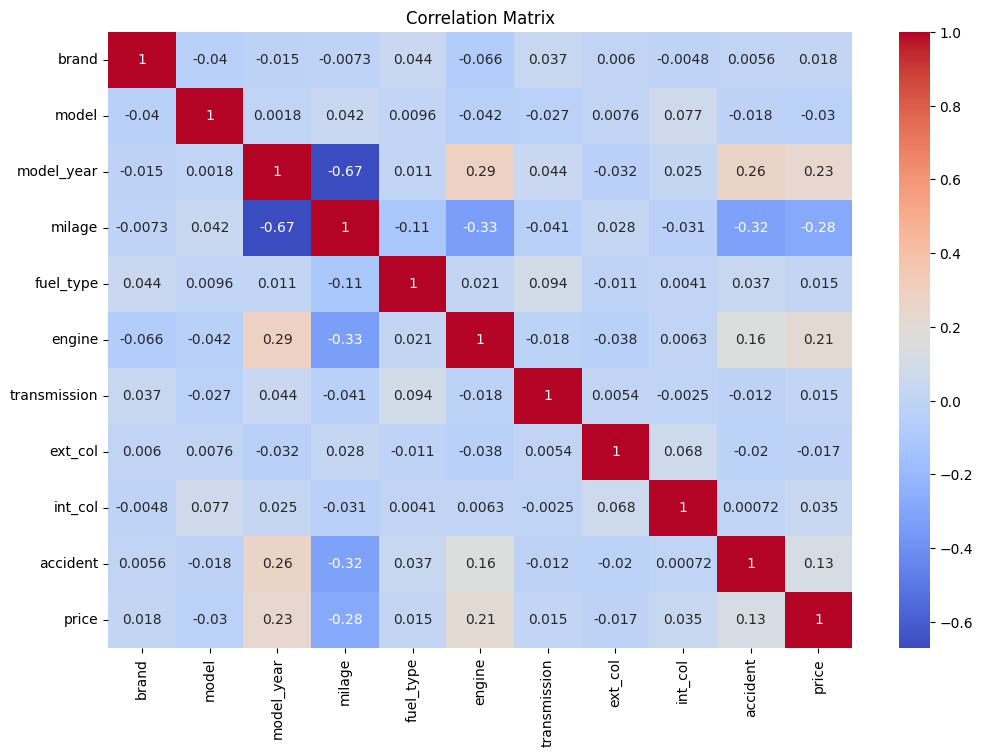

In [15]:
plt.figure(figsize=(12, 8))
corr_matrix = df_cars.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

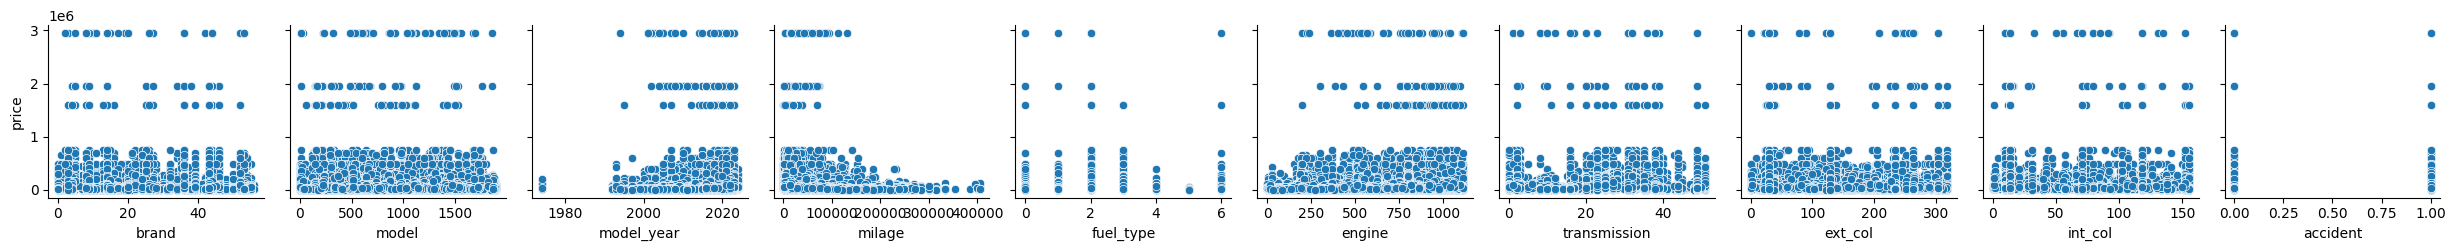

In [16]:
# plt.figure(figsize=(12, 8))
# sns.pairplot(df_cars)
# plt.show()

sns.pairplot(df_cars, y_vars='price', x_vars=df_cars.columns[:-1])
plt.show()

In [17]:
# chosen_features = df_cars.iloc[:, 2:4]  # Select columns 0 and 2
# sns.scatterplot(chosen_features)
# plt.show()

array([[<Axes: title={'center': 'brand'}>,
        <Axes: title={'center': 'model'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'fuel_type'}>,
        <Axes: title={'center': 'engine'}>],
       [<Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'ext_col'}>,
        <Axes: title={'center': 'int_col'}>],
       [<Axes: title={'center': 'accident'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

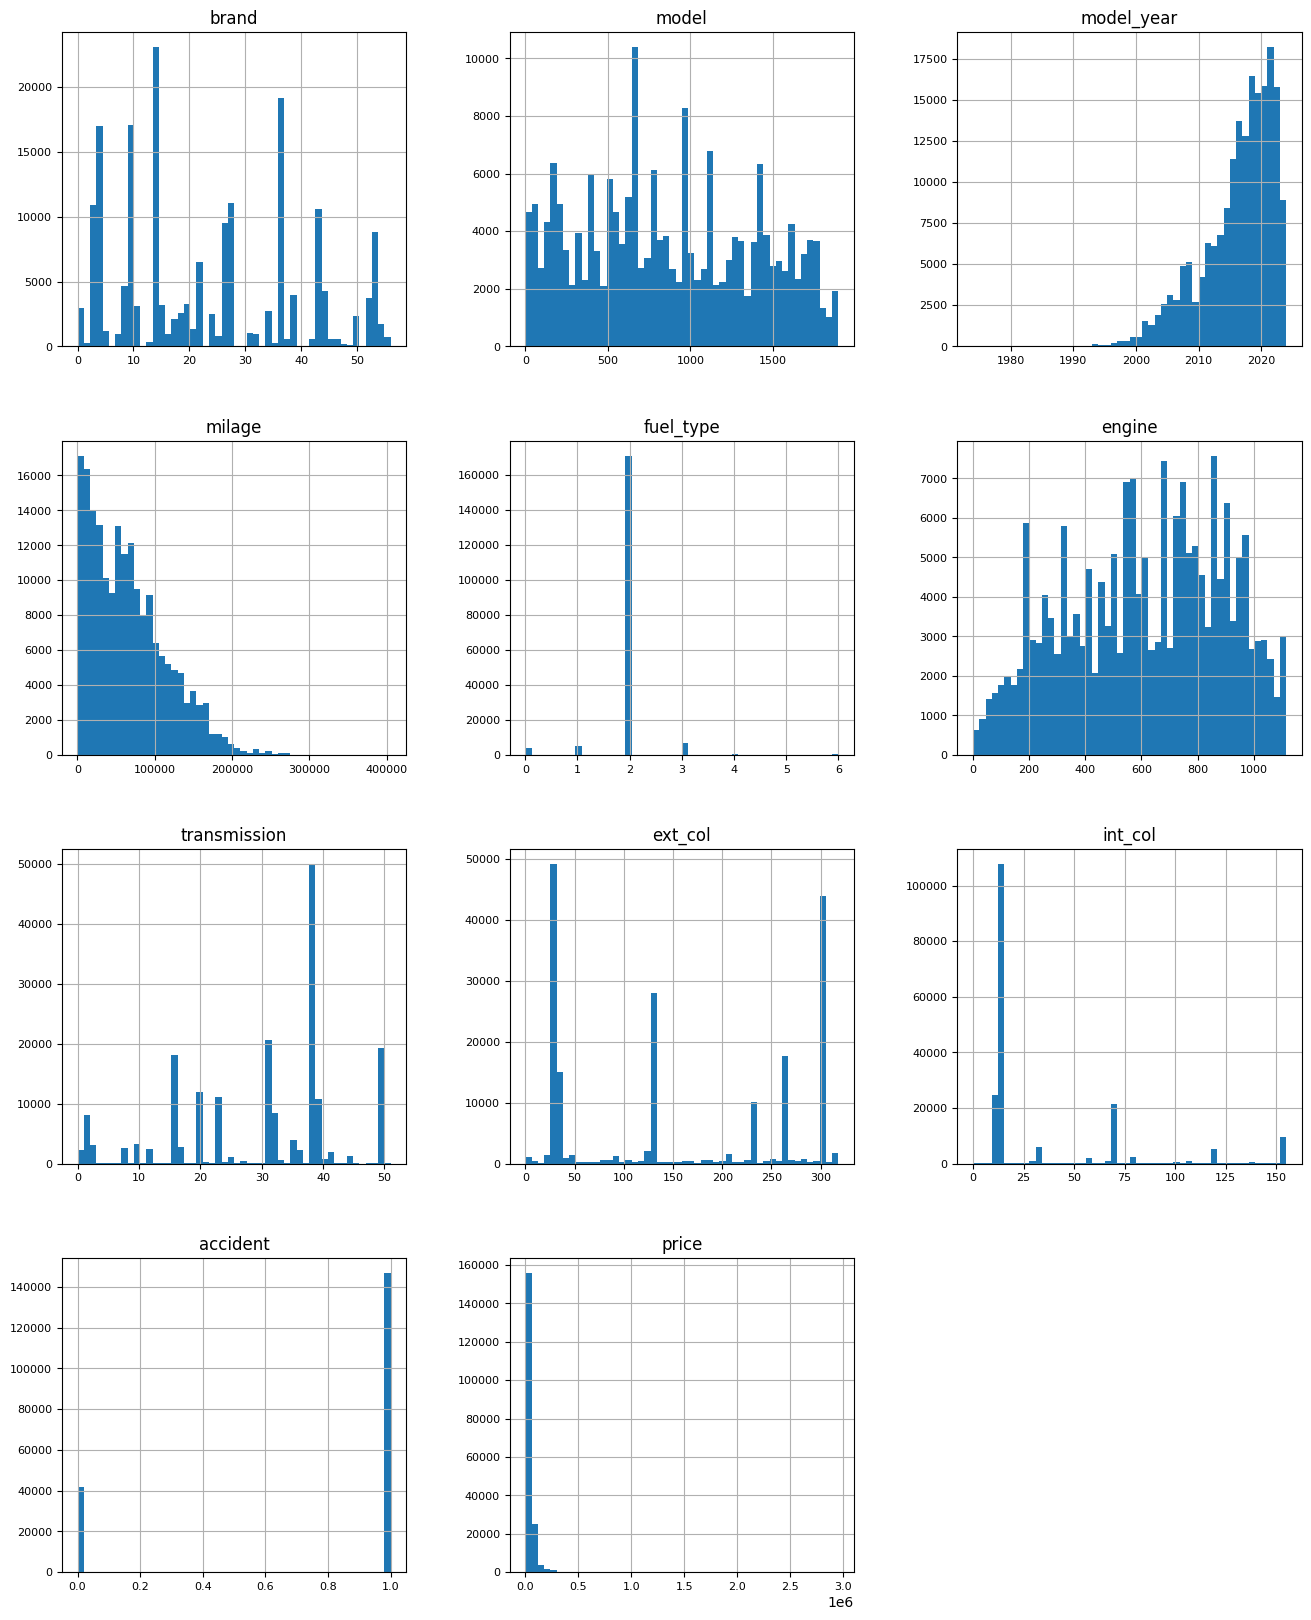

In [18]:
df_cars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Data Preprocessing

In [20]:
df_ = df_cars.copy()
df_cars['price'] = np.log(df_cars['price'])

# I noticed that some correlation values were reduced. 
# Whether this was a good decision shall be judged by the change in validation set perfromance
# df_cars['milage'] = np.log(df_cars['milage'])
# df_cars['model_year'] = np.log(df_cars['model_year'])

In [21]:
df_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,31,495,2007,213000,2,116,38,312,71,1,2.121404
1,28,930,2002,143250,2,366,38,263,10,0,2.142063
2,9,1575,2002,136731,1,640,38,38,71,1,2.255456
3,16,758,2017,19500,2,863,49,29,14,1,2.371590
4,36,1077,2021,7388,2,259,23,29,10,1,2.441269
...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,2.324537
188529,36,206,2018,28600,2,770,31,304,14,0,2.333013
188530,36,223,2021,13650,2,921,23,304,14,1,2.431199
188531,3,1471,2022,13895,2,512,1,82,14,1,2.429150


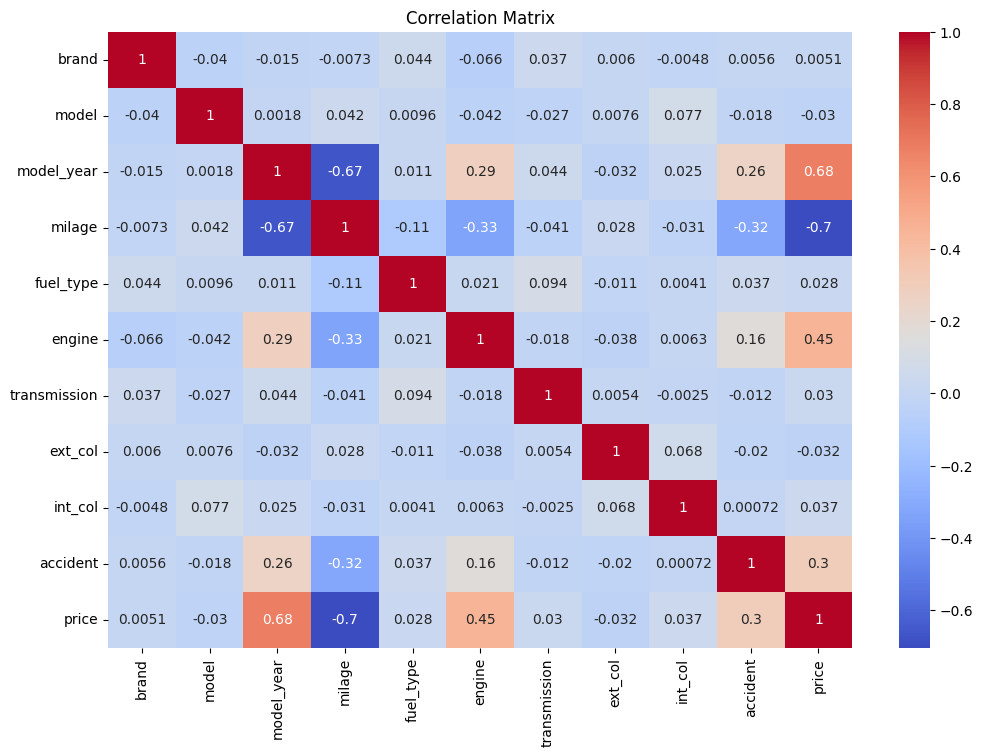

In [22]:
plt.figure(figsize=(12, 8))
corr_matrix = df_cars.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

array([[<Axes: title={'center': 'brand'}>,
        <Axes: title={'center': 'model'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'fuel_type'}>,
        <Axes: title={'center': 'engine'}>],
       [<Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'ext_col'}>,
        <Axes: title={'center': 'int_col'}>],
       [<Axes: title={'center': 'accident'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

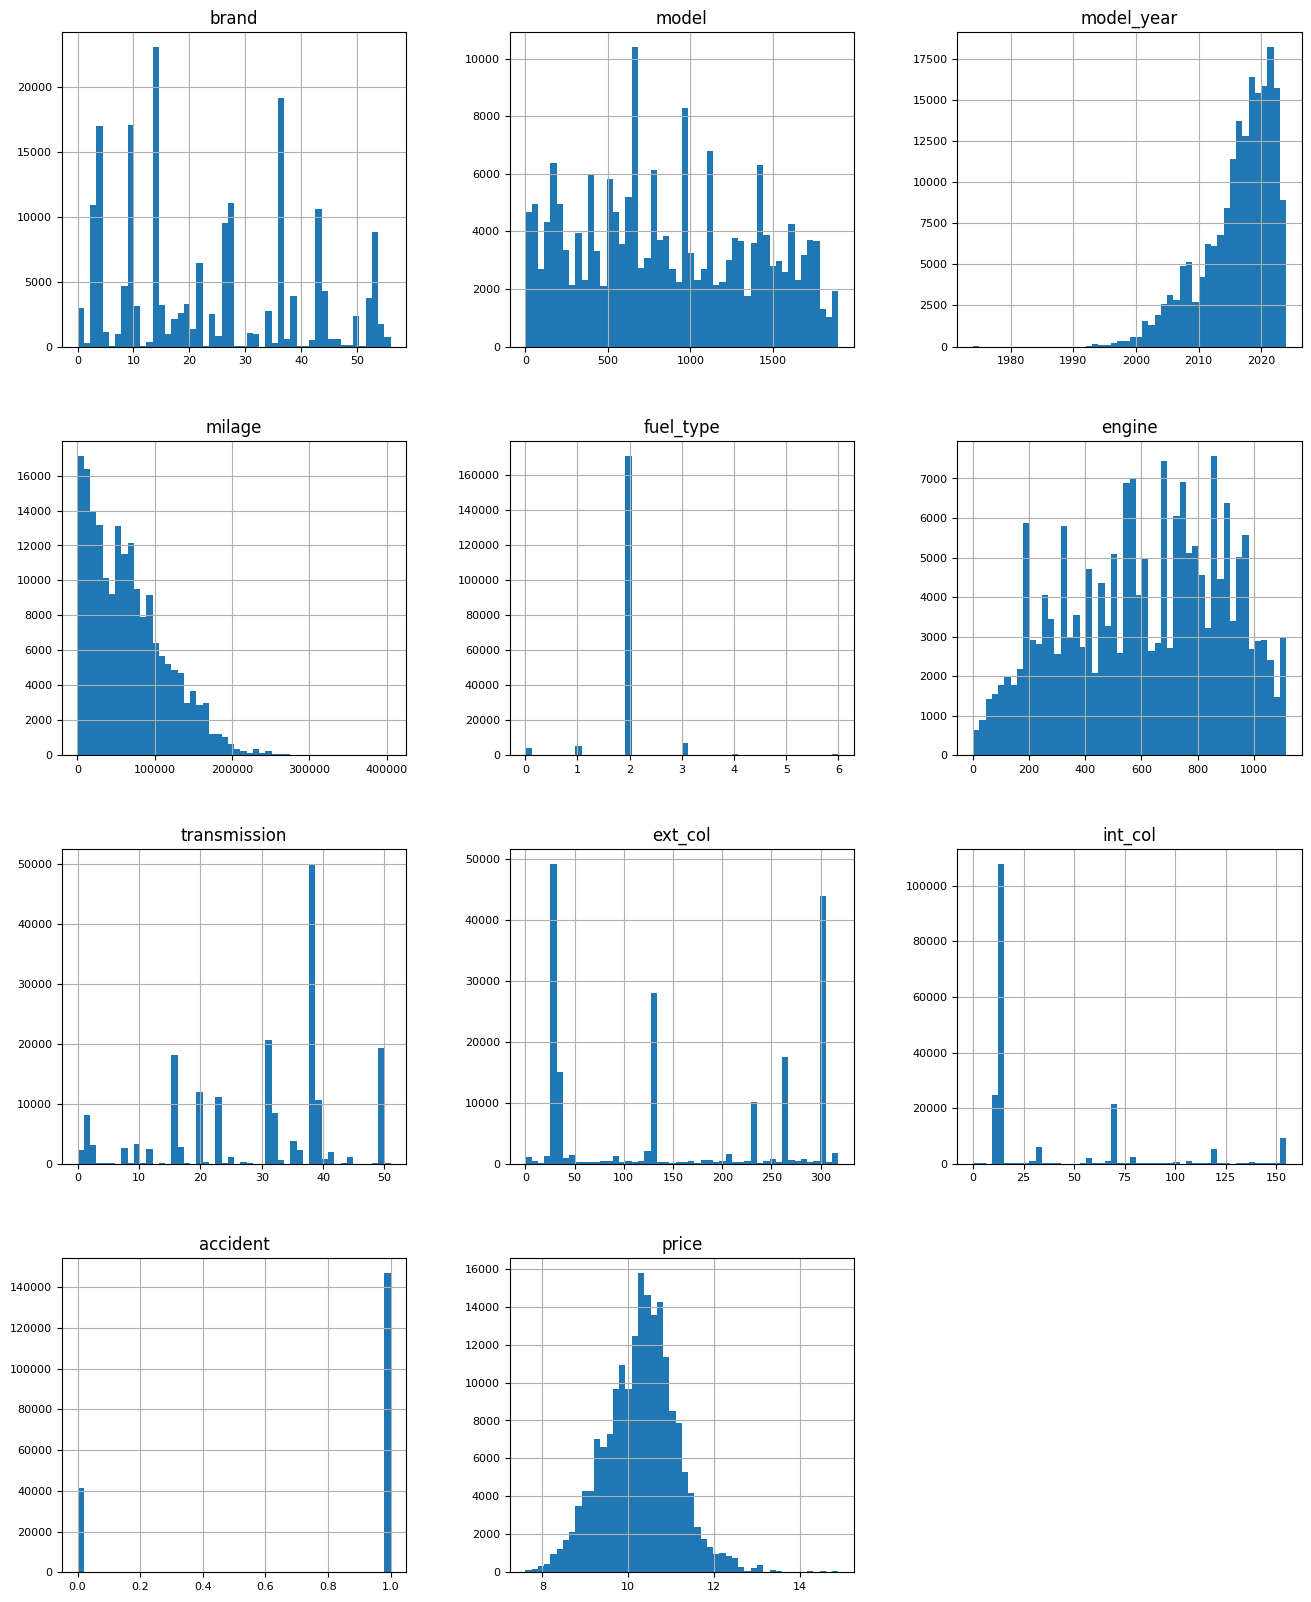

In [42]:
df_cars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


# df_cars['model_year'].hist(figsize=(10, 6), bins=50, xlabelsize=8, ylabelsize=8)
# plt.title('Histogram of Specific Column')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()


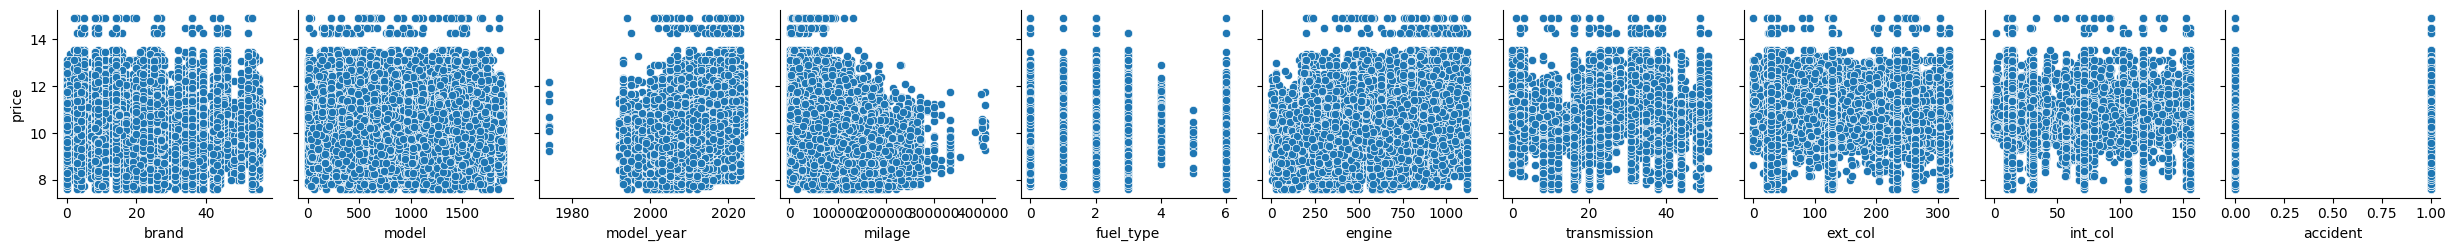

In [31]:
sns.pairplot(df_cars, y_vars='price', x_vars=df_cars.columns[:-1])
plt.show()

In [23]:
df_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,31,495,2007,213000,2,116,38,312,71,1,2.121404
1,28,930,2002,143250,2,366,38,263,10,0,2.142063
2,9,1575,2002,136731,1,640,38,38,71,1,2.255456
3,16,758,2017,19500,2,863,49,29,14,1,2.371590
4,36,1077,2021,7388,2,259,23,29,10,1,2.441269
...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,2.324537
188529,36,206,2018,28600,2,770,31,304,14,0,2.333013
188530,36,223,2021,13650,2,921,23,304,14,1,2.431199
188531,3,1471,2022,13895,2,512,1,82,14,1,2.429150


#### Gaussian Dist - just for example. can be used in future, instead of log transformations

In [24]:
# import numpy as np
# import pandas as pd
# from scipy import stats
# import matplotlib.pyplot as plt

# col = 'model_year'
# col = 'milage'

# # Ensure the data is positive
# df_['price'] = df_['price'] + 1  # Shift if necessary

# # Apply Box-Cox Transformation
# transformed_data, best_lambda = stats.boxcox(df_[col])
# df_['transformed_column'] = transformed_data

# # Print the best lambda found
# print("Best lambda:", best_lambda)

# # Plot original vs. transformed data
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(df_[col], bins=50)
# plt.title("Original Data")

# plt.subplot(1, 2, 2)
# plt.hist(df_['transformed_column'], bins=50)
# plt.title("Box-Cox Transformed Data")

# plt.show()


## **Model Training**

In [25]:
X = df_cars.drop('price', axis=1) 
y = df_cars['price']
# y_log = np.log(df_cars['price'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Use on the training data to calculate scaling parameters and apply scaling
X_train = scaler.fit_transform(X_train)
# Use on the val data to apply the same scaling (based on the training data) without recalculating parameters
X_val = scaler.transform(X_val)

In [103]:
w_init = np.zeros(X_train.shape[1])
initial_b = 0
iterations = 1000
alpha = 4.0e-12
alpha = 4.0e-3
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost    52.89   
Iteration  100: Cost    23.75   
Iteration  200: Cost    10.72   
Iteration  300: Cost     4.89   
Iteration  400: Cost     2.27   
Iteration  500: Cost     1.10   
Iteration  600: Cost     0.57   
Iteration  700: Cost     0.33   
Iteration  800: Cost     0.23   
Iteration  900: Cost     0.18   
b,w found by gradient descent: 10.10,[ 0.0198792  -0.00568251  0.28207804 -0.31651932 -0.01737955  0.1900948
  0.00647207 -0.00250802  0.01632301  0.04873047] 


In [104]:
y_val_pred = np.dot(X_val, w_final) + b_final
train_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
train_r2 = r2_score(y_val, y_val_pred)

In [107]:
train_rmse

0.5654615769847159

In [108]:
train_r2

0.5534585822454909

#### Ridge + Lasso + ElasticNet - GridSearch

Best Hyperparameters: {'alpha': 4.281332398719396e-06}

Training Root Mean Squared Error (RMSE): 0.5303212655448093
Training R^2 Score: 0.6049166618922679

Validation Root Mean Squared Error (RMSE): 0.5343871036725789
Validation R^2 Score: 0.6011886731453848


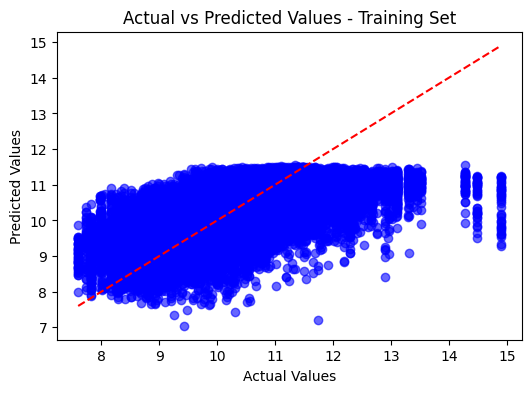

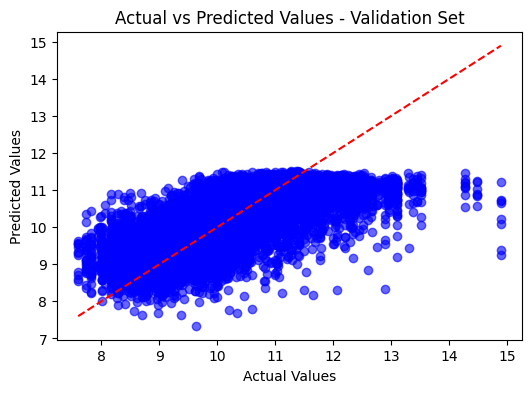

In [43]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

param_grid = {
    'alpha': np.logspace(-8, 2, 20)  # Regularization strength
}

# reg = Lasso()
# reg = Ridge()
reg = ElasticNet()
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Calculate performance metrics for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Root Mean Squared Error (RMSE):", train_rmse)
print("Training R^2 Score:", train_r2)

# Calculate performance metrics for the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
print("\nValidation Root Mean Squared Error (RMSE):", val_rmse)
print("Validation R^2 Score:", val_r2)

plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Training Set")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Validation Set")
plt.show()


#### Polynomial of 2 - ElasticNet - GridSearch

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # Regularization strength
}

reg = ElasticNet()
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

grid_search.fit(X_poly, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# y_train_pred = reg.predict(X_train)
# y_val_pred = reg.predict(X_val)

In [30]:
print("Best Hyperparameters:", grid_search.best_params_)
y_train_pred = grid_search.best_estimator_.predict(X_poly)
y_val_pred = grid_search.best_estimator_.predict(X_poly_val)

# Calculate performance metrics for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Root Mean Squared Error (RMSE):", train_rmse)
print("Training R^2 Score:", train_r2)

# Calculate performance metrics for the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
print("\nValidation Root Mean Squared Error (RMSE):", val_rmse)
print("Validation R^2 Score:", val_r2)


Training Root Mean Squared Error (RMSE): 0.5246564747734408
Training R^2 Score: 0.6133119924329947

Validation Root Mean Squared Error (RMSE): 0.5275016788022914
Validation R^2 Score: 0.6113996037296117


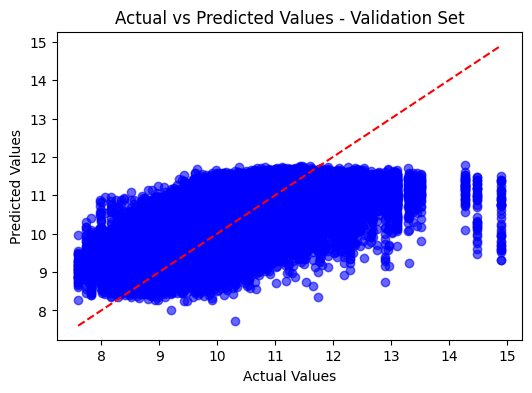

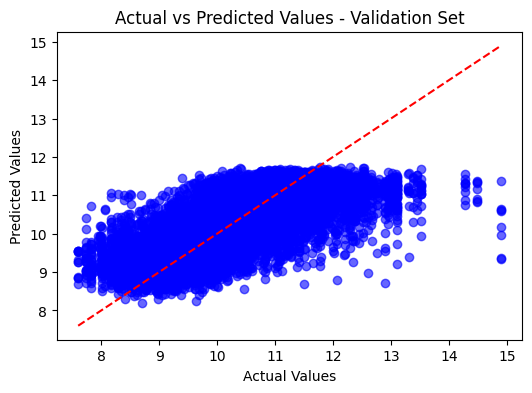

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Training Set")
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Validation Set")
plt.show()

#### RandomForestRegressor

In [46]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
# importances = permutation_importance(model, X_val, y_val)

y_val_pred = model.predict(X_val)

val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", val_mse)
print("Validation R² Score:", val_r2)

Validation Mean Squared Error (MSE): 0.26115283423873925
Validation R² Score: 0.6352878006649514


#### XGBoost ~ DecisionTrees

In [45]:
import xgboost as xgb

# Initialize and train the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' is for regression
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_val_pred = xgb_model.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", val_mse)
print("Validation R² Score:", val_r2)


Validation Mean Squared Error (MSE): 0.24381139917769976
Validation R² Score: 0.6595059292530403


#### Adaboost ~ DecisionTrees

In [48]:
# Initialize and train the AdaBoost regressor
base_model = DecisionTreeRegressor(max_depth=4)  # AdaBoost requires a base estimator; DecisionTreeRegressor is commonly used
ada_model = AdaBoostRegressor(base_model, n_estimators=100)  # n_estimators is the number of boosting stages to be run
ada_model.fit(X_train, y_train)

# Predict and evaluate
y_val_pred = ada_model.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", val_mse)
print("Validation R² Score:", val_r2)


Validation Mean Squared Error (MSE): 0.36418145442365185
Validation R² Score: 0.49140349333346744


#### SVR ~ SupportVectorRegression

In [50]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_svr_model = grid_search.best_estimator_
y_val_pred = best_svr_model.predict(X_val)

val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", val_mse)
print("Validation R² Score:", val_r2)


## NeuralNetworks

Different approaches

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(10,)),  
    layers.Dense(1, activation='linear')   
])

model.compile(optimizer='sgd', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

y_pred = model.predict(X_val)
print(mean_squared_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

# It calculates the mean sq error in one step
model.evaluate(X_val, y_val)

Epoch 1/5


c:\Users\HamzaJadoon\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4714/4714 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1660 - val_loss: 0.0042
Epoch 2/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 3/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 4/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0027 - val_loss: 0.0027
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.002715167839407029
0.6031047632658094
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027


0.00271516852080822

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model = models.Sequential([
    layers.Dense(1, activation='linear', input_shape=(10,))    
])

model.compile(optimizer='sgd', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

y_pred = model.predict(X_val)
print(mean_squared_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

# It calculates the mean sq error in one step
model.evaluate(X_val, y_val)

Epoch 1/5


c:\Users\HamzaJadoon\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2259 - val_loss: 0.0027
Epoch 2/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 3/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 4/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 5/5
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0026
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step
0.0026439555712306074
0.6135143628588984
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0026


0.0026439554058015347